In [3]:
path = '../data/bitly_usagov/example.txt'
print(open(path).readline())
print(type(open(path).readline())) #open(file) 打开文件  readline只读取第一行

{ "a": "Mozilla\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\/535.11 (KHTML, like Gecko) Chrome\/17.0.963.78 Safari\/535.11", "c": "US", "nk": 1, "tz": "America\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\/\/www.facebook.com\/l\/7AQEFzjSi\/1.usa.gov\/wfLQtf", "u": "http:\/\/www.ncbi.nlm.nih.gov\/pubmed\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }

<class 'str'>


In [22]:
#将键值对类似形式String数据 变为 字典dict
#json形式
import json
path = '../data/example.txt'
records = [json.loads(line) for line in open(path)]
print(type(records))
print(type(records[0]))
print(records[0])
print(records[0]['u'])

<class 'list'>
<class 'dict'>
{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11', 'c': 'US', 'nk': 1, 'tz': 'America/New_York', 'gr': 'MA', 'g': 'A6qOVH', 'h': 'wfLQtf', 'l': 'orofrog', 'al': 'en-US,en;q=0.8', 'hh': '1.usa.gov', 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf', 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991', 't': 1331923247, 'hc': 1331822918, 'cy': 'Danvers', 'll': [42.576698, -70.954903]}
http://www.ncbi.nlm.nih.gov/pubmed/22415991


In [27]:
time_zones = []
for record in records:
    if 'tz' in record.keys():  #有一些列没有'tz' 字段 先进行清洗
        time_zones.append(record['tz'])
print(len(time_zones))
print(time_zones[:10])

3440
['America/New_York', 'America/Denver', 'America/New_York', 'America/Sao_Paulo', 'America/New_York', 'America/New_York', 'Europe/Warsaw', '', '', '']


In [36]:
counts = {}
for tz in time_zones:
    if(tz in counts.keys()):
        counts[tz] += 1
    else:
        counts[tz] = 1
print(type(counts))
print(counts)
for key in counts.keys():
    if 'Asia' in key:
        print(key)

<class 'dict'>
{'America/New_York': 1251, 'America/Denver': 191, 'America/Sao_Paulo': 33, 'Europe/Warsaw': 16, '': 521, 'America/Los_Angeles': 382, 'Asia/Hong_Kong': 10, 'Europe/Rome': 27, 'Africa/Ceuta': 2, 'Europe/Madrid': 35, 'Asia/Kuala_Lumpur': 3, 'Asia/Nicosia': 1, 'Europe/London': 74, 'Pacific/Honolulu': 36, 'America/Chicago': 400, 'Europe/Malta': 2, 'Europe/Lisbon': 8, 'Europe/Paris': 14, 'Europe/Copenhagen': 5, 'America/Mazatlan': 1, 'Europe/Dublin': 3, 'Europe/Brussels': 4, 'America/Vancouver': 12, 'Europe/Amsterdam': 22, 'Europe/Prague': 10, 'Europe/Stockholm': 14, 'America/Anchorage': 5, 'Asia/Bangkok': 6, 'Europe/Berlin': 28, 'America/Rainy_River': 25, 'Europe/Budapest': 5, 'Asia/Tokyo': 37, 'Europe/Vienna': 6, 'America/Phoenix': 20, 'Asia/Jerusalem': 3, 'Asia/Karachi': 3, 'America/Bogota': 3, 'America/Indianapolis': 20, 'America/Montreal': 9, 'Asia/Calcutta': 9, 'Europe/Skopje': 1, 'Asia/Beirut': 4, 'Australia/NSW': 6, 'Chile/Continental': 6, 'America/Halifax': 4, 'Americ

In [31]:
#字典按照value进行排序
#sorted方法
sorted_count = sorted(counts.items(), key = lambda x:x[1], reverse= True)
print(type(sorted_count))
print(sorted_count[:10])

<class 'list'>
[('America/New_York', 1251), ('', 521), ('America/Chicago', 400), ('America/Los_Angeles', 382), ('America/Denver', 191), ('Europe/London', 74), ('Asia/Tokyo', 37), ('Pacific/Honolulu', 36), ('Europe/Madrid', 35), ('America/Sao_Paulo', 33)]


In [40]:
#pandas方法
from pandas import DataFrame, Series
import pandas as pd
import numpy as np
frame = DataFrame(records) #将数据变为DataFrame类型进行后续处理

In [42]:
frame

,a,c,nk,tz,gr,g,h,l,al,hh,r,u,t,hc,cy,ll,_heartbeat_,kw
0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,1.0,America/New_York,MA,A6qOVH,wfLQtf,orofrog,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,http://www.ncbi.nlm.nih.gov/pubmed/22415991,1.331923e+09,1.331823e+09,Danvers,"[42.576698, -70.954903]",NaN,NaN
1,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331923e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN
2,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,US,1.0,America/New_York,DC,xxr3Qb,xxr3Qb,bitly,en-US,1.usa.gov,http://t.co/03elZC4Q,http://boxer.senate.gov/en/press/releases/0316...,1.331923e+09,1.331920e+09,Washington,"[38.9007, -77.043098]",NaN,NaN
3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,BR,0.0,America/Sao_Paulo,27,zCaLwp,zUtuOu,alelex88,pt-br,1.usa.gov,direct,http://apod.nasa.gov/apod/ap120312.html,1.331923e+09,1.331923e+09,Braz,"[-23.549999, -46.616699]",NaN,NaN
4,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,0.0,America/New_York,MA,9b6kNl,9b6kNl,bitly,"en-US,en;q=0.8",bit.ly,http://www.shrewsbury-ma.gov/selco/,http://www.shrewsbury-ma.gov/egov/gallery/1341...,1.331923e+09,1.273672e+09,Shrewsbury,"[42.286499, -71.714699]",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3555,Mozilla/4.0 (compatible; MSIE 9.0; Windows NT ...,US,1.0,America/New_York,NJ,e5SvKE,fqPSr9,tweetdeckapi,en,1.usa.gov,direct,http://www.fda.gov/AdvisoryCommittees/Committe...,1.331927e+09,1.301298e+09,Paramus,"[40.9445, -74.07]",NaN,NaN
3556,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...,US,0.0,America/Chicago,OK,jQLtP4,jQLtP4,bitly,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l.php?u=http%3A%2F%2F1...,http://www.okc.gov/PublicNotificationSystem/Fo...,1.331927e+09,1.307530e+09,Oklahoma City,"[35.4715, -97.518997]",NaN,NaN
3557,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331927e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN
3558,GoogleProducer,US,0.0,America/Los_Angeles,CA,zjtI4X,zjtI4X,bitly,NaN,1.usa.gov,direct,http://www.ahrq.gov/qual/qitoolkit/,1.331927e+09,1.327529e+09,Mountain View,"[37.419201, -122.057404]",NaN,NaN


In [44]:
frame['tz']
print(type(frame['tz'])) #每一列单独取出都是Series类型

<class 'pandas.core.series.Series'>


In [46]:
tz_counts = frame['tz'].value_counts() #value_counts()方法作用于Series直接进行计数
tz_counts

America/New_York        1251
                         521
America/Chicago          400
America/Los_Angeles      382
America/Denver           191
                        ... 
Australia/Queensland       1
Asia/Pontianak             1
Asia/Manila                1
Europe/Ljubljana           1
Asia/Kuching               1
Name: tz, Length: 97, dtype: int64

In [47]:
#清洗数据 把""空值进行清洗
clean_tz = frame['tz'].fillna('Missing') #fillna 可以替换缺失值（NA）
print(clean_tz == '')  #居然可以直接用==判断内容 输出Bool类型

0       False
1       False
2       False
3       False
4       False
        ...  
3555    False
3556    False
3557    False
3558    False
3559    False
Name: tz, Length: 3560, dtype: bool


In [49]:
clean_tz[clean_tz == ''] = 'Unknown' #直接通过布尔型数组索引替换即可
tz_counts = clean_tz.value_counts()
tz_counts

America/New_York        1251
Unknown                  521
America/Chicago          400
America/Los_Angeles      382
America/Denver           191
                        ... 
America/Montevideo         1
Africa/Casablanca          1
Australia/Queensland       1
Asia/Pontianak             1
America/Caracas            1
Name: tz, Length: 98, dtype: int64

<AxesSubplot:>

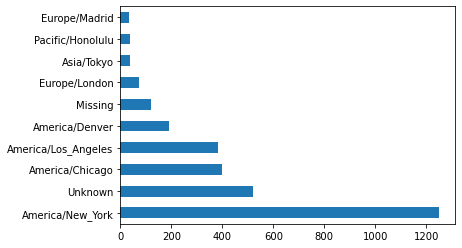

In [51]:
tz_counts[:10].plot(kind='barh', rot=0) #将最多的十个进行图示

In [54]:
for x in frame.a.dropna():
    print(type(x))
    print(x.split())

<class 'str'>
['Mozilla/5.0', '(Windows', 'NT', '6.1;', 'WOW64)', 'AppleWebKit/535.11', '(KHTML,', 'like', 'Gecko)', 'Chrome/17.0.963.78', 'Safari/535.11']
<class 'str'>
['GoogleMaps/RochesterNY']
<class 'str'>
['Mozilla/4.0', '(compatible;', 'MSIE', '8.0;', 'Windows', 'NT', '6.1;', 'WOW64;', 'Trident/4.0;', 'SLCC2;', '.NET', 'CLR', '2.0.50727;', '.NET', 'CLR', '3.5.30729;', '.NET', 'CLR', '3.0.30729;', 'Media', 'Center', 'PC', '6.0;', '.NET4.0C;', '.NET4.0E;', 'InfoPath.3)']
<class 'str'>
['Mozilla/5.0', '(Macintosh;', 'Intel', 'Mac', 'OS', 'X', '10_6_8)', 'AppleWebKit/534.52.7', '(KHTML,', 'like', 'Gecko)', 'Version/5.1.2', 'Safari/534.52.7']
<class 'str'>
['Mozilla/5.0', '(Windows', 'NT', '6.1;', 'WOW64)', 'AppleWebKit/535.11', '(KHTML,', 'like', 'Gecko)', 'Chrome/17.0.963.79', 'Safari/535.11']
<class 'str'>
['Mozilla/5.0', '(Windows', 'NT', '6.1;', 'WOW64)', 'AppleWebKit/535.11', '(KHTML,', 'like', 'Gecko)', 'Chrome/17.0.963.79', 'Safari/535.11']
<class 'str'>
['Mozilla/5.0', '(Win

<class 'str'>
['Mozilla/5.0', '(iPad;', 'CPU', 'OS', '5_1', 'like', 'Mac', 'OS', 'X)', 'AppleWebKit/534.46', '(KHTML,', 'like', 'Gecko)', 'Mobile/9B176', 'Twitter', 'for', 'iPad']
<class 'str'>
['Mozilla/5.0', '(Windows', 'NT', '6.1;', 'WOW64)', 'AppleWebKit/535.11', '(KHTML,', 'like', 'Gecko)', 'Chrome/17.0.963.79', 'Safari/535.11']
<class 'str'>
['Mozilla/5.0', '(Windows', 'NT', '6.1;', 'WOW64;', 'rv:10.0.2)', 'Gecko/20100101', 'Firefox/10.0.2']
<class 'str'>
['Mozilla/5.0', '(Windows;', 'U;', 'Windows', 'NT', '6.1;', 'en-US;', 'rv:1.9.2.26)', 'Gecko/20120128', 'Firefox/3.6.26']
<class 'str'>
['Mozilla/5.0', '(Windows', 'NT', '6.1)', 'AppleWebKit/535.11', '(KHTML,', 'like', 'Gecko)', 'Chrome/17.0.963.79', 'Safari/535.11']
<class 'str'>
['Mozilla/5.0', '(Windows', 'NT', '6.1)', 'AppleWebKit/535.8', '(KHTML,', 'like', 'Gecko)', 'Chrome/18.6.872.0', 'Safari/535.8']
<class 'str'>
['Mozilla/5.0', '(Windows', 'NT', '6.1;', 'WOW64;', 'rv:9.0.1)', 'Gecko/20100101', 'Firefox/9.0.1']
<class 's

<class 'str'>
['Mozilla/5.0', '(SymbianOS/9.3;', 'Series60/3.2', 'NokiaE5-00.2/042.007;', 'Profile/MIDP-2.1', 'Configuration/CLDC-1.1', ')', 'AppleWebKit/525', '(KHTML,', 'like', 'Gecko)', 'Version/3.0', 'BrowserNG/7.2.6.2', '3gpp-gba']
<class 'str'>
['Mozilla/4.0', '(compatible;', 'MSIE', '8.0;', 'Windows', 'NT', '5.1;', 'Trident/4.0;', '.NET', 'CLR', '1.1.4322;', '.NET', 'CLR', '2.0.50727;', '.NET', 'CLR', '3.0.4506.2152;', '.NET', 'CLR', '3.5.30729;', 'MS-RTC', 'LM', '8)']
<class 'str'>
['Mozilla/5.0', '(Windows;', 'U;', 'Windows', 'NT', '5.1;', 'en-US;', 'rv:1.9.2.23)', 'Gecko/20110920', 'Firefox/3.6.23', '(.NET', 'CLR', '3.5.30729)']
<class 'str'>
['Mozilla/5.0', '(Windows;', 'U;', 'Windows', 'NT', '6.0;', 'en-US;', 'rv:1.9.2.3)', 'Gecko/20100401', 'Firefox/3.6.3', '(.NET', 'CLR', '3.5.30729)']
<class 'str'>
['Mozilla/5.0', '(Windows', 'NT', '6.1)', 'AppleWebKit/535.11', '(KHTML,', 'like', 'Gecko)', 'Chrome/17.0.963.79', 'Safari/535.11']
<class 'str'>
['Mozilla/5.0', '(Macintosh;'

<class 'str'>
['GoogleMaps/RochesterNY']
<class 'str'>
['Mozilla/4.0', '(compatible;', 'MSIE', '8.0;', 'Windows', 'NT', '6.1;', 'WOW64;', 'Trident/4.0;', 'GTB7.3;', 'SLCC2;', '.NET', 'CLR', '2.0.50727;', '.NET', 'CLR', '3.5.30729;', '.NET', 'CLR', '3.0.30729;', 'Media', 'Center', 'PC', '6.0;', '.NET4.0C;', 'BRI/2)']
<class 'str'>
['Mozilla/4.0', '(compatible;', 'MSIE', '8.0;', 'Windows', 'NT', '6.1;', 'WOW64;', 'Trident/4.0;', 'SLCC2;', '.NET', 'CLR', '2.0.50727;', '.NET', 'CLR', '3.5.30729;', '.NET', 'CLR', '3.0.30729;', '.NET4.0C;', '.NET4.0E;', 'InfoPath.3)']
<class 'str'>
['Mozilla/5.0', '(Windows', 'NT', '6.1;', 'WOW64;', 'rv:10.0)', 'Gecko/20100101', 'Firefox/10.0']
<class 'str'>
['Mozilla/5.0', '(Windows', 'NT', '6.1;', 'WOW64;', 'rv:10.0.1)', 'Gecko/20100101', 'Firefox/10.0.1']
<class 'str'>
['Mozilla/5.0', '(Windows', 'NT', '6.1;', 'WOW64;', 'rv:10.0.2)', 'Gecko/20100101', 'Firefox/10.0.2']
<class 'str'>
['Mozilla/5.0', '(Macintosh;', 'Intel', 'Mac', 'OS', 'X', '10_6_8)', 'App

In [55]:
browser_list = []
for x in frame.a.dropna():
    browser_list.append(x.split()[0])
browser = Series(browser_list)

In [57]:
browser.value_counts()

Mozilla/5.0                                          2594
Mozilla/4.0                                           601
GoogleMaps/RochesterNY                                121
Opera/9.80                                             34
TEST_INTERNET_AGENT                                    24
GoogleProducer                                         21
Mozilla/6.0                                             5
BlackBerry8520/5.0.0.681                                4
Dalvik/1.4.0                                            3
BlackBerry8520/5.0.0.592                                3
Socialite/7766                                          2
BlackBerry9630/5.0.0.975                                2
Goldfire                                                2
Acoon                                                   2
HTTP_Request2/2.0.0                                     1
LG-LG220C[TF268435458416597116000000013524223841]       1
ICE                                                     1
BlackBerry9300

In [58]:
cframe = frame[frame.a.notnull()]
cframe

,a,c,nk,tz,gr,g,h,l,al,hh,r,u,t,hc,cy,ll,_heartbeat_,kw
0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,1.0,America/New_York,MA,A6qOVH,wfLQtf,orofrog,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,http://www.ncbi.nlm.nih.gov/pubmed/22415991,1.331923e+09,1.331823e+09,Danvers,"[42.576698, -70.954903]",NaN,NaN
1,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331923e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN
2,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,US,1.0,America/New_York,DC,xxr3Qb,xxr3Qb,bitly,en-US,1.usa.gov,http://t.co/03elZC4Q,http://boxer.senate.gov/en/press/releases/0316...,1.331923e+09,1.331920e+09,Washington,"[38.9007, -77.043098]",NaN,NaN
3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,BR,0.0,America/Sao_Paulo,27,zCaLwp,zUtuOu,alelex88,pt-br,1.usa.gov,direct,http://apod.nasa.gov/apod/ap120312.html,1.331923e+09,1.331923e+09,Braz,"[-23.549999, -46.616699]",NaN,NaN
4,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,0.0,America/New_York,MA,9b6kNl,9b6kNl,bitly,"en-US,en;q=0.8",bit.ly,http://www.shrewsbury-ma.gov/selco/,http://www.shrewsbury-ma.gov/egov/gallery/1341...,1.331923e+09,1.273672e+09,Shrewsbury,"[42.286499, -71.714699]",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3555,Mozilla/4.0 (compatible; MSIE 9.0; Windows NT ...,US,1.0,America/New_York,NJ,e5SvKE,fqPSr9,tweetdeckapi,en,1.usa.gov,direct,http://www.fda.gov/AdvisoryCommittees/Committe...,1.331927e+09,1.301298e+09,Paramus,"[40.9445, -74.07]",NaN,NaN
3556,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...,US,0.0,America/Chicago,OK,jQLtP4,jQLtP4,bitly,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l.php?u=http%3A%2F%2F1...,http://www.okc.gov/PublicNotificationSystem/Fo...,1.331927e+09,1.307530e+09,Oklahoma City,"[35.4715, -97.518997]",NaN,NaN
3557,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331927e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN
3558,GoogleProducer,US,0.0,America/Los_Angeles,CA,zjtI4X,zjtI4X,bitly,NaN,1.usa.gov,direct,http://www.ahrq.gov/qual/qitoolkit/,1.331927e+09,1.327529e+09,Mountain View,"[37.419201, -122.057404]",NaN,NaN


In [62]:
clean_a_line = cframe.a
clean_a_line
print(type(clean_a_line))

<class 'pandas.core.series.Series'>


In [66]:
os_counts = {'Windows':0, 'not Windows':0}
for each in clean_a_line:
    if('Windows' in each):
        os_counts['Windows'] += 1
    else:
        os_counts['not Windows'] += 1
print(os_counts)

{'Windows': 2246, 'not Windows': 1194}


In [67]:
operating_system = np.where(cframe['a'].str.contains('Windows'), 'Windows', 'Not Windows')
operating_system

array(['Windows', 'Not Windows', 'Windows', ..., 'Not Windows',
       'Not Windows', 'Windows'], dtype='<U11')

In [70]:
sort_by_timezone_os = cframe.groupby(['tz', operating_system])
print(sort_by_timezone_os)

In [82]:
agg_counts = sort_by_timezone_os.size().unstack().fillna(0)
print(sort_by_timezone_os.size())
print(type(sort_by_timezone_os.size()))
print('---------------------------------------')
print(sort_by_timezone_os.size().unstack())
print(type(sort_by_timezone_os.size().unstack()))
print('---------------------------------------')
print(agg_counts)
print(type(agg_counts))          #在groupby之后形成的是花括号类型的组织结构 如下面的第一部分所示 倒数第二第三行 都是奥克兰
                                 #Windows和not Windows按顺序排列 
                                 #使用unstack()就可以将这种模式 变为DataFrame有横纵行列的模式

tz                            
                   Not Windows    245
                   Windows        276
Africa/Cairo       Windows          3
Africa/Casablanca  Windows          1
Africa/Ceuta       Windows          2
                                 ... 
Europe/Warsaw      Windows         15
Europe/Zurich      Not Windows      4
Pacific/Auckland   Not Windows      3
                   Windows          8
Pacific/Honolulu   Windows         36
Length: 149, dtype: int64
<class 'pandas.core.series.Series'>
---------------------------------------
                     Not Windows  Windows
tz                                       
                           245.0    276.0
Africa/Cairo                 NaN      3.0
Africa/Casablanca            NaN      1.0
Africa/Ceuta                 NaN      2.0
Africa/Johannesburg          NaN      1.0
...                          ...      ...
Europe/Volgograd             NaN      1.0
Europe/Warsaw                1.0     15.0
Europe/Zurich                

In [72]:
print(type(agg_counts))

<class 'pandas.core.frame.DataFrame'>


In [89]:
indexer = agg_counts.sum(1).argsort()
print(agg_counts.sum(1))
print(type(agg_counts.sum(1)))        #sum(1)将同一行的每一列加起来
print('-----------------------')
print(indexer)                        #argsort()返回的是排序的下标
                                      #第一个是24说明最小的是下表为24的位置，倒数第二行是0 说明第二大的位置是0位置 是'' 
                                      #最后一行是29说明 和最大的位置是索引29 明显是纽约
print(type(indexer))
print(agg_counts.iloc[29])

tz
                       521.0
Africa/Cairo             3.0
Africa/Casablanca        1.0
Africa/Ceuta             2.0
Africa/Johannesburg      1.0
                       ...  
Europe/Volgograd         1.0
Europe/Warsaw           16.0
Europe/Zurich            4.0
Pacific/Auckland        11.0
Pacific/Honolulu        36.0
Length: 97, dtype: float64
<class 'pandas.core.series.Series'>
-----------------------
tz
                       24
Africa/Cairo           20
Africa/Casablanca      21
Africa/Ceuta           92
Africa/Johannesburg    87
                       ..
Europe/Volgograd       15
Europe/Warsaw          22
Europe/Zurich          12
Pacific/Auckland        0
Pacific/Honolulu       29
Length: 97, dtype: int64
<class 'pandas.core.series.Series'>
Not Windows    339.0
Windows        912.0
Name: America/New_York, dtype: float64


In [74]:
count_subset = agg_counts.take(indexer)[-10:]
count_subset

,Not Windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


<AxesSubplot:ylabel='tz'>

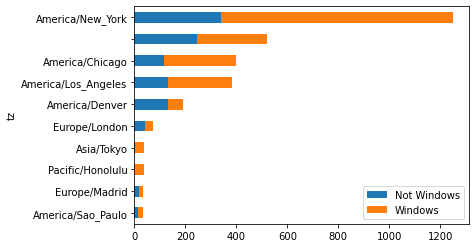

In [75]:
count_subset.plot(kind = 'barh', stacked = True)

In [77]:
normed_subset = count_subset.div(count_subset.sum(1), axis = 0)

<AxesSubplot:ylabel='tz'>

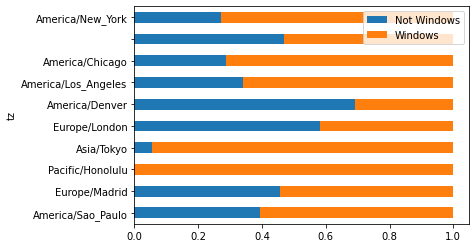

In [78]:
normed_subset.plot(kind = 'barh', stacked = True)